Sinh viên: Huỳnh Thiện Tùng (19522492)

Bài tập 3 Cài đặt Softmax Regression với Tensorflow/Pytorch

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.8.0


# Dataset


In [3]:
means = [[2, 2], [2, 8], [8, 2], [8, 8]]
cov = [[1, 0], [0, 1]]
N = 500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)

X = np.concatenate((X0, X1, X2, X3), axis = 0).T
print(X.shape)

original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N).T

(2, 2000)


In [4]:
original_label.shape
Y = original_label[:]
print(len(Y))

2000


In [5]:
X = np.transpose(X)
X.shape

(2000, 2)

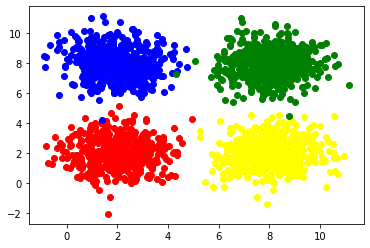

In [6]:
one = [i for i in range(len(original_label)) if original_label[i] == 0 ]
two = [i for i in range(len(original_label)) if original_label[i] == 1]
three = [i for i in range(len(original_label)) if original_label[i] == 2 ]
four = [i for i in range(len(original_label)) if original_label[i] == 3 ]

one_ = X[one]
two_ = X[two]
three_ = X[three]
four_ = X[four]

plt.scatter(one_[:,0], one_[:,1], color='red')
plt.scatter(two_[:,0], two_[:,1], color='blue')
plt.scatter(three_[:,0], three_[:,1], color='yellow')
plt.scatter(four_[:,0], four_[:,1], color='green')
plt.show()

In [7]:
x_train = X
y_train = Y

In [8]:
print('X_train: ', x_train.shape)
print('Y_train: ', len(y_train))

X_train:  (2000, 2)
Y_train:  2000


In [9]:
num_classes = 4

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_dim=2),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
50/50 [==============================] - 0s 3ms/step - loss: 1.9997 - accuracy: 0.3544 - val_loss: 0.6920 - val_accuracy: 0.8125
Epoch 2/50
50/50 [==============================] - 0s 908us/step - loss: 1.3485 - accuracy: 0.3462 - val_loss: 1.3589 - val_accuracy: 0.2650
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 1.0632 - accuracy: 0.4737 - val_loss: 2.1301 - val_accuracy: 0.0000e+00
Epoch 4/50
50/50 [==============================] - 0s 956us/step - loss: 0.9653 - accuracy: 0.6263 - val_loss: 2.4426 - val_accuracy: 0.0000e+00
Epoch 5/50
50/50 [==============================] - 0s 924us/step - loss: 0.9062 - accuracy: 0.6294 - val_loss: 2.5348 - val_accuracy: 0.0000e+00
Epoch 6/50
50/50 [==============================] - 0s 951us/step - loss: 0.8547 - accuracy: 0.6375 - val_loss: 2.4719 - val_accuracy: 0.0000e+00
Epoch 7/50
50/50 [==============================] - 0s 963us/step - loss: 0.8071 - accuracy: 0.6544 - val_loss: 2.4102 - val_accuracy: 0

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(x_train)

In [15]:
index = 1400
print('Prediction: ', np.argmax(predictions[index]))
print('Ground truth: ', original_label[index])

Prediction:  2
Ground truth:  2


In [16]:
predicted_labels = [np.argmax(row) for row in predictions]
print(len(predicted_labels))

2000


In [17]:
total_correct = np.count_nonzero(predicted_labels == original_label)
number_of_sample = len(original_label)
print(f'Corrected {total_correct}/{number_of_sample}')

Corrected 1962/2000


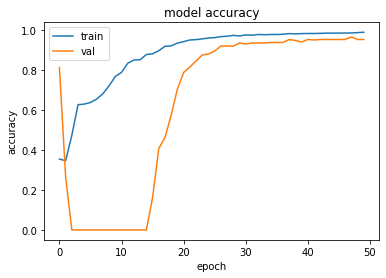

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

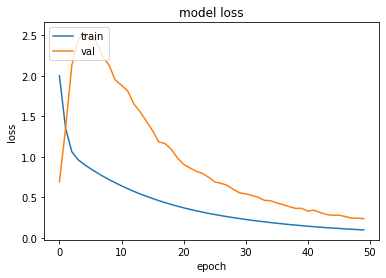

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
class CustomModel(object):
    def __init__(self, model):
        self.model = model
        
    def predict(self, X):
        y_pred = self.model(X)
        return np.argmax(y_pred, axis=1)

C:\Users\huynh\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


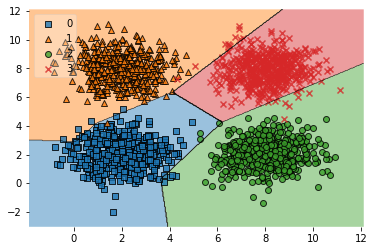

In [21]:
from mlxtend.plotting import plot_decision_regions
custom_model = CustomModel(probability_model)
plot_decision_regions(x_train, y_train, clf=custom_model, legend=2)
plt.show()